       DATE  num_of_incidents
0   2021-01                 7
1   2021-02                 3
2   2021-03                 5
3   2021-04                 4
4   2021-05                 2
5   2021-06                 3
6   2021-07                 6
7   2021-08                 4
8   2021-09                 6
9   2021-10                 2
10  2021-11                 2
11  2021-12                 6
12  2022-01                 5
13  2022-02                 3
14  2022-03                 9
15  2022-04                 0
16  2022-05                 2
17  2022-06                 3
18  2022-07                 2
19  2022-08                 5
20  2022-09                11
21  2022-10                 3
22  2022-11                 5
23  2022-12                 1
24  2023-01                 1


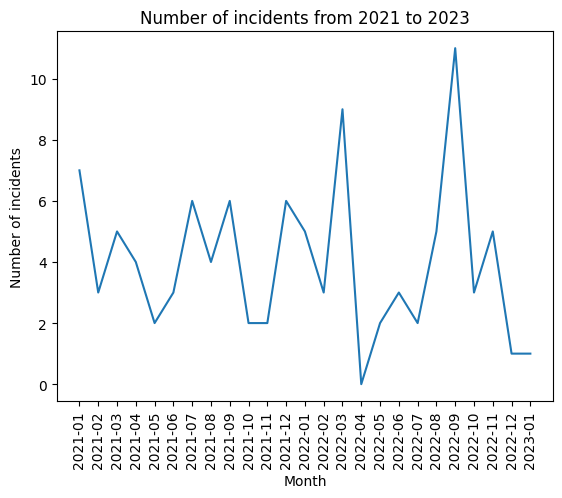

       DATE  ENG  FRA  GER  HUN  ITA
0   2021-01    2    0    0    2    3
1   2021-02    0    0    1    1    1
2   2021-03    0    1    2    1    1
3   2021-04    1    0    1    1    1
4   2021-05    0    1    0    0    1
5   2021-06    1    0    1    0    1
6   2021-07    1    2    0    0    3
7   2021-08    1    0    1    1    1
8   2021-09    1    0    2    1    2
9   2021-10    1    0    0    0    1
10  2021-11    0    1    0    1    0
11  2021-12    2    0    2    0    2
12  2022-01    0    0    3    0    2
13  2022-02    1    0    1    0    1
14  2022-03    3    3    1    2    0
15  2022-04    0    0    0    0    0
16  2022-05    0    0    1    0    1
17  2022-06    1    1    1    0    0
18  2022-07    0    0    1    0    1
19  2022-08    2    1    0    2    0
20  2022-09    2    2    2    0    5
21  2022-10    1    0    0    1    1
22  2022-11    0    2    1    1    1
23  2022-12    0    1    0    0    0
24  2023-01    0    0    1    0    0


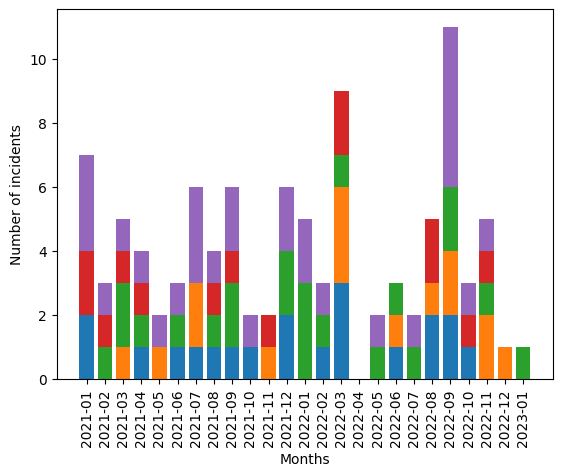

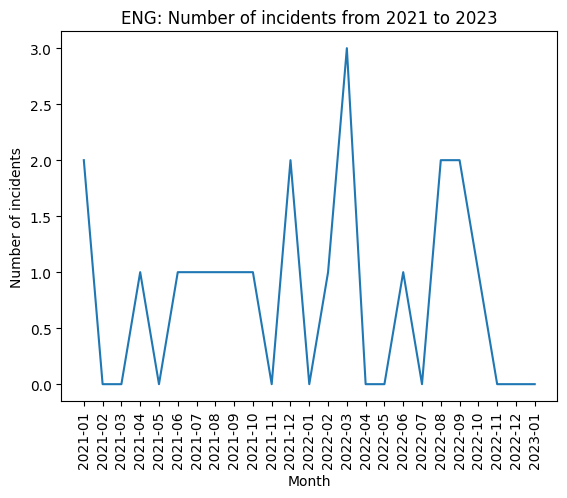

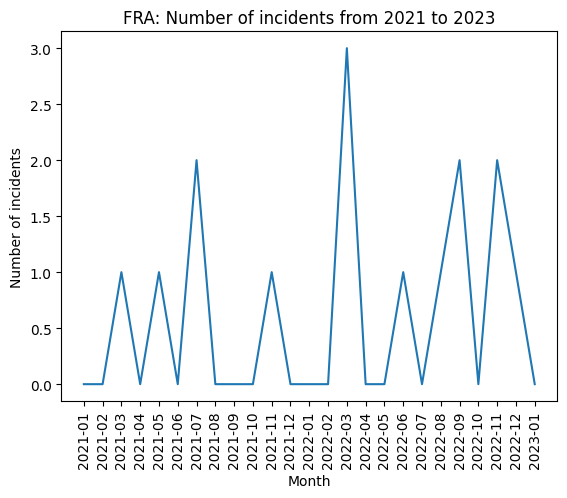

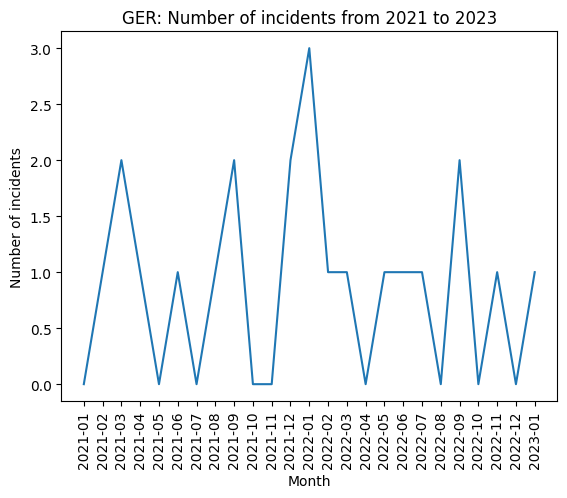

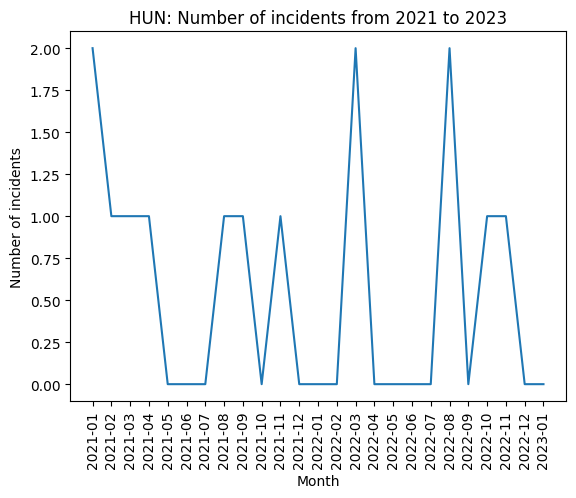

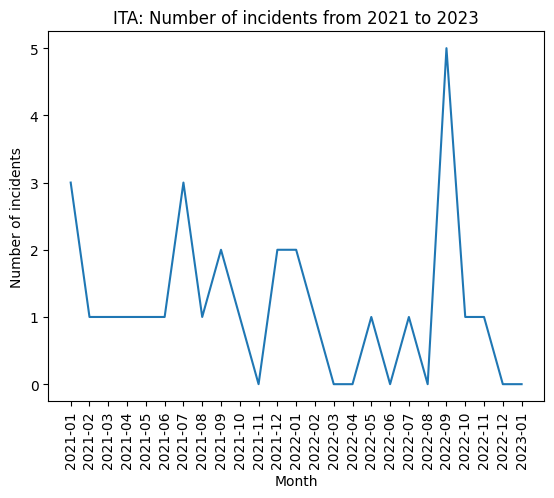

In [10]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('incidents.csv')


def cast_date_str_to_date_and_sort(dataframe):
    dataframe['DATE'] = pd.to_datetime(dataframe['DATE'])
    dataframe.sort_values(by='DATE', inplace=True)
    new_date_range_filled = pd.date_range(start='2021-01', end='2023-01', freq='MS')
    dataframe.set_index("DATE", inplace=True)
    new_index = pd.Index(new_date_range_filled, name="DATE")
    dataframe2 = dataframe.reindex(new_index, fill_value=0)
    dataframe2.reset_index(inplace=True)
    dataframe2['DATE'] = pd.to_datetime(dataframe2['DATE']).dt.strftime('%Y-%m')
    
    return dataframe2

    
    
def get_num_of_incidents_for_month_dataframe():
    date_with_num_of_incidents = df.groupby('DATE').size().reset_index(name='num_of_incidents')
    date_with_num_of_incidents = cast_date_str_to_date_and_sort(date_with_num_of_incidents)
    print(date_with_num_of_incidents)
    
    return date_with_num_of_incidents


def draw_line_chart_for_num_of_incidents_with_months(month_and_num_of_incidents, num_of_inc, name_prefix=""):
    x = month_and_num_of_incidents['DATE']
    y = month_and_num_of_incidents[num_of_inc]

    plt.plot(x, y)
    plt.title(f'{name_prefix}Number of incidents from 2021 to 2023')
    plt.xlabel('Month')
    plt.ylabel('Number of incidents')
    plt.xticks(rotation=90)
    plt.show()

    
def get_num_of_incidents_for_month_for_each_country():
    gb_countries = df.groupby('COUNTRY')
    dataframes = []
    for country, datafr in gb_countries:
        date_and_num_of_incidents = datafr.groupby('DATE').size().reset_index(name=country)
        date_and_num_of_incidents = cast_date_str_to_date_and_sort(date_and_num_of_incidents)
        dataframes.append(date_and_num_of_incidents)
    
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'], how='outer'), dataframes).fillna('0')
    print(df_merged)
    return df_merged
    
    
def draw_stacked_bar(dataframe):
    dates = dataframe['DATE']
    country_names = list(dataframe.columns.values)
    country_names.remove('DATE')

    countries = [dataframe[country_name] for country_name in country_names]
    bottom = 0
    for i, country in enumerate(countries):
        plt.bar(dates, country, bottom=bottom, label=country_names[i])
        bottom+=country
        
    plt.xticks(rotation=90)
    plt.xlabel('Months')
    plt.ylabel('Number of incidents')
    plt.show()


def draw_charts_for_each_country_with_num_of_incidents():
    gb_countries = df.groupby('COUNTRY')
    for country, datafr in gb_countries:
        date_and_num_of_incidents = datafr.groupby('DATE').size().reset_index(name=f"{country}_num_of_incidents")
        date_and_num_of_incidents = cast_date_str_to_date_and_sort(date_and_num_of_incidents)
        draw_line_chart_for_num_of_incidents_with_months(date_and_num_of_incidents, f"{country}_num_of_incidents", f"{country}: ")
    
    
#task 1   
number_of_incidents_for_month = get_num_of_incidents_for_month_dataframe()
draw_line_chart_for_num_of_incidents_with_months(number_of_incidents_for_month, "num_of_incidents")
#task 2
dataframe = get_num_of_incidents_for_month_for_each_country()
draw_stacked_bar(dataframe)
#task 3
draw_charts_for_each_country_with_num_of_incidents()





